<a href="https://colab.research.google.com/github/jainrasik/Airbnb-Booking-Analysis-Rasik-Jain/blob/main/Rasik_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # Importing the essential library for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# locating and reading the data file on drive for analysis
p='/content/drive/MyDrive/Colab Notebooks/data files/'
df=pd.read_csv(dp+'Airbnb NYC 2019.csv')


In [ ]:
df.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
#checking the general information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#checking the null values present in the data
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# replacing the null value with 'not avaliable' and checking it again.
df['name'].fillna('not avaliable',inplace=True)
df['host_name'].fillna('not avaliable',inplace=True)

In [ ]:
# Dropping the columns 'id','last_review and'reviews_per_month'
df.drop(["id",'reviews_per_month','last_review'],axis=1,inplace=True)

In [ ]:
df.describe()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

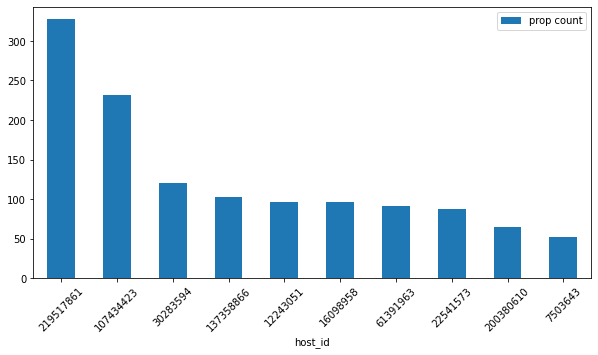

In [ ]:
#checking which host has maximum number of properties
prop_df=df['host_id'].value_counts().reset_index().head(10)
plt.rcParams['figure.figsize']=(10,5)
prop_df.rename(columns={'index':'host_id','host_id':'prop count'},inplace=True)
prop_df.set_index('host_id',inplace=True)
prop_df.plot(kind='bar')
plt.title("top 10 host which has maximum number of listing in airbnb")
plt.ylabel('property count')
plt.xlabel('host id')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

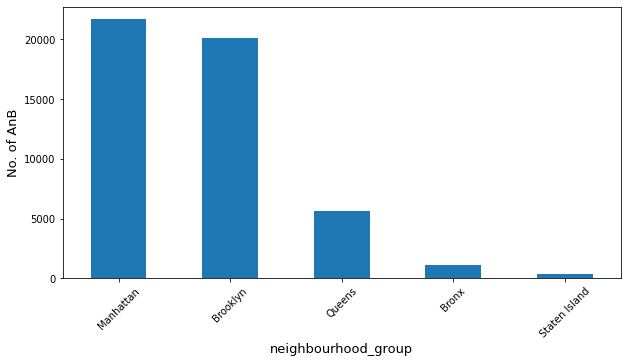

In [ ]:
# Checking which area has most number of airbnb
airbnb_density=df['neighbourhood_group'].value_counts()
airbnb_density.plot(kind='bar')
plt.xlabel('neighbourhood_group',fontsize=13)
plt.ylabel('No. of AnB',fontsize=13)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

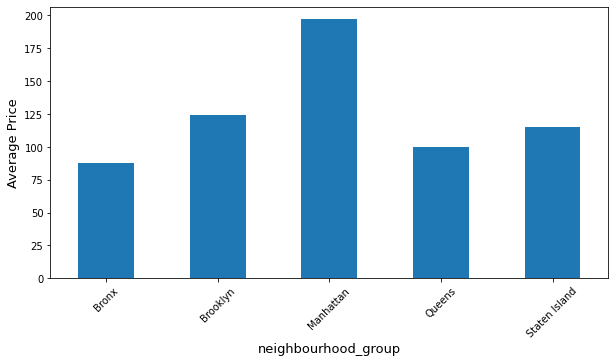

In [ ]:
# Checking which area has highest average price of airbnb
b=df.groupby('neighbourhood_group')['price'].mean()
b.plot(kind='bar')
plt.xlabel('neighbourhood_group',fontsize=13)
plt.ylabel('Average Price',fontsize=13)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

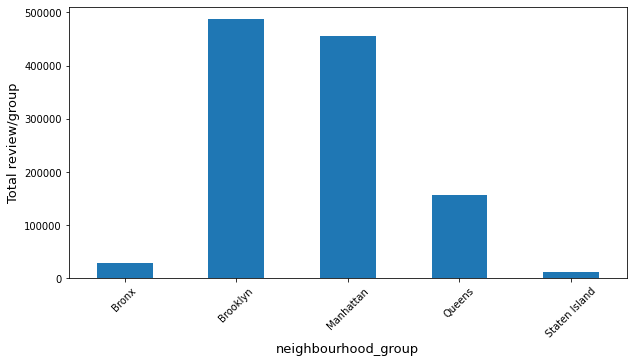

In [ ]:
# Checking which area has highest average price of airbnb
b=df.groupby('neighbourhood_group')['number_of_reviews'].sum()
b.plot(kind='bar')
plt.xlabel('neighbourhood_group',fontsize=13)
plt.ylabel('Total review/group',fontsize=13)
plt.xticks(rotation=45)

Text(0, 0.5, 'airbnb counts')

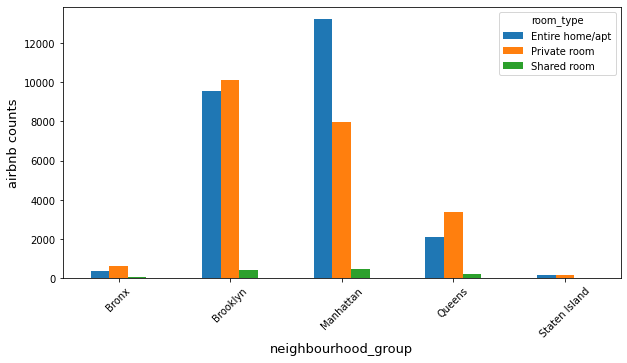

In [ ]:
# checking for Airbnb count in neighbourhood_group according to room_type
aa=df.groupby(['neighbourhood_group','room_type'])['name'].count().unstack()
aa.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=45)
plt.xlabel('neighbourhood_group',fontsize=13)
plt.ylabel('airbnb counts',fontsize=13)

Text(0, 0.5, 'Average Price')

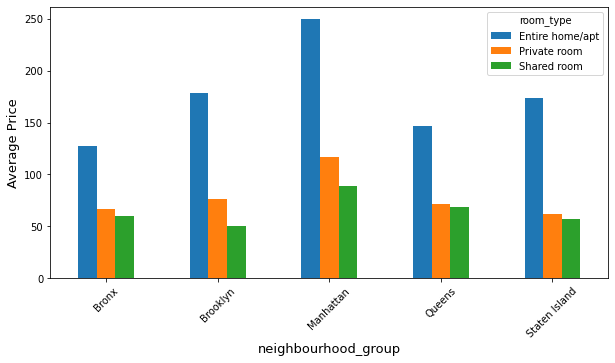

In [ ]:
# checking for Average price of airbnb in neighbourhood_group according to room_type
aa=df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
aa.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=45)
plt.xlabel('neighbourhood_group',fontsize=13)
plt.ylabel('Average Price',fontsize=13)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

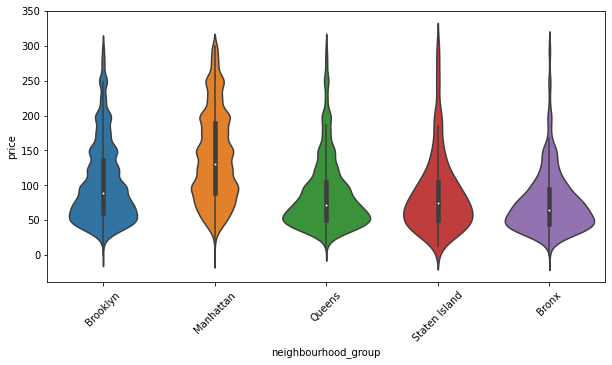

In [ ]:
# checking for price distribution across various regions in newyork
sns.violinplot(data=df[df['price']<300],x='neighbourhood_group',y='price')
plt.xticks(rotation=45)

In [ ]:
# checking for price distribution across geographic location in newyork
a=df.loc[df['price']<300,['latitude','longitude','price']]
a.plot(kind='scatter',y='latitude',x='longitude',c='price',figsize=(10,5),alpha=1,cmap=plt.get_cmap('jet'))
plt.xlabel('Latitude',fontsize=13)
plt.ylabel('Longititude',fontsize=13)
plt.xticks(rotation=45)

NameError: ignored

(array([-74.15, -74.1 , -74.05, -74.  , -73.95, -73.9 , -73.85, -73.8 ,
        -73.75, -73.7 , -73.65]), <a list of 0 Text major ticklabel objects>)

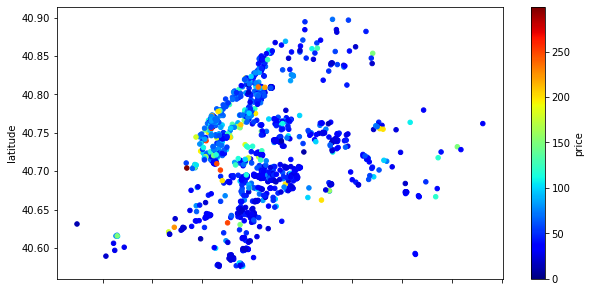

In [ ]:
# checking for price distribution of shared rooms across geographic location in newyork
a=df.loc[(df['price']<300) & (df['room_type']=='Shared room'),['latitude','longitude','price']]
a.plot(kind='scatter',y='latitude',x='longitude',c='price',figsize=(10,5),alpha=1,cmap=plt.get_cmap('jet'))
plt.xticks(rotation=45)

(array([-74.3, -74.2, -74.1, -74. , -73.9, -73.8, -73.7, -73.6]),
 <a list of 0 Text major ticklabel objects>)

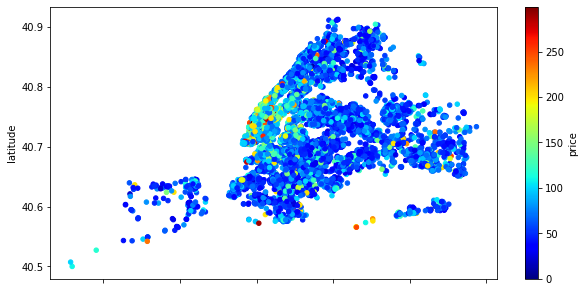

In [ ]:
# checking for price distribution of private rooms across geographic location in newyork
a=df.loc[(df['price']<300) & (df['room_type']=='Private room'),['latitude','longitude','price']]
a.plot(kind='scatter',y='latitude',x='longitude',c='price',figsize=(10,5),alpha=1,cmap=plt.get_cmap('jet'))
plt.xticks(rotation=45)

(array([-74.3, -74.2, -74.1, -74. , -73.9, -73.8, -73.7, -73.6]),
 <a list of 0 Text major ticklabel objects>)

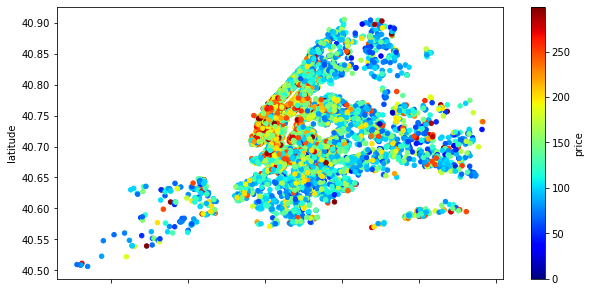

In [ ]:
# checking for price distribution of Entire home/apt across geographic location in newyork
a=df.loc[(df['price']<300) & (df['room_type']=='Entire home/apt'),['latitude','longitude','price']]
a.plot(kind='scatter',y='latitude',x='longitude',c='price',figsize=(10,5),alpha=1,cmap=plt.get_cmap('jet'))
plt.xticks(rotation=45)